# Diabetes Prediction using Machine Learning

# Introduction:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage (by UCI Machine Learning).

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
num_cols=[col for col in df.columns if df[col].dtypes != 'O' and col not in 'Outcome']

In [8]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
df[num_cols].nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
dtype: int64

# Visualisation

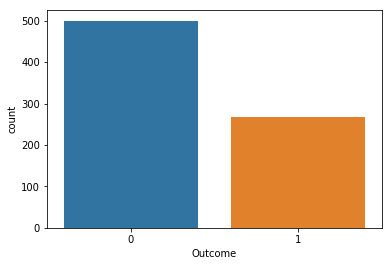

In [10]:
sns.countplot(df.Outcome)

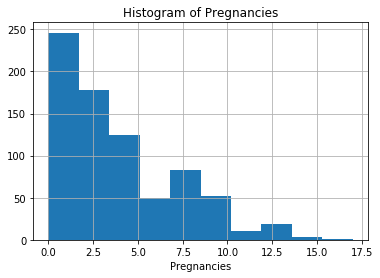

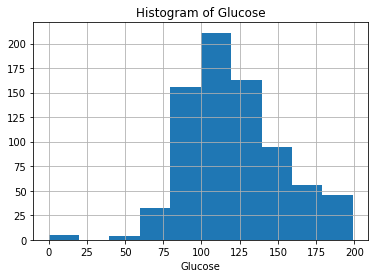

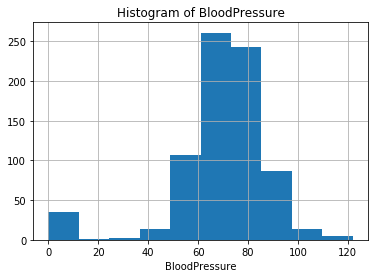

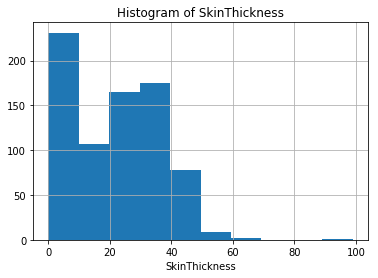

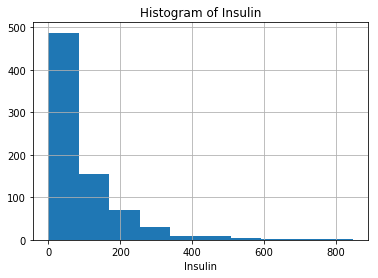

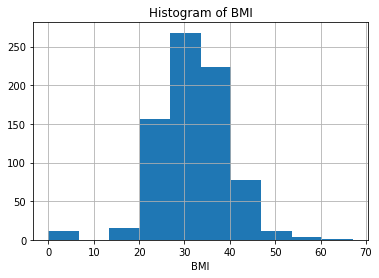

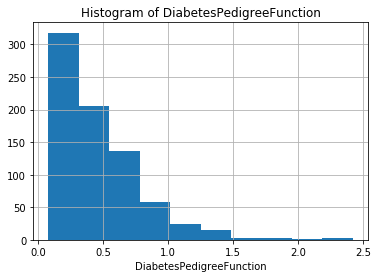

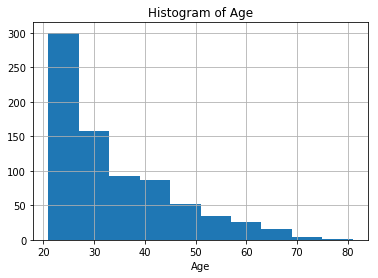

In [11]:
def hist_num(data,numeric_cols):
    for col in numeric_cols:
        data[col].hist()
        plt.xlabel(col)
        plt.title('Histogram of '+ col)
        plt.show()

hist_num(df,num_cols)        

There are several right-skewed(Age, Diabetes Pedigree Function, BMI, Insulin, SkinThickness, Pregnancies) and normally distributed (Blood Pressure, Glucose) variables. We may observe outliers at those right-skewed variables. Also, these variables may indicate a range boundary.

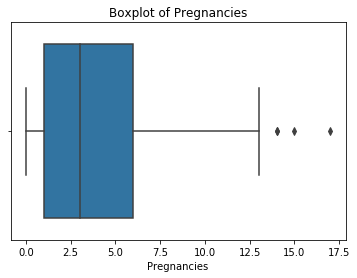

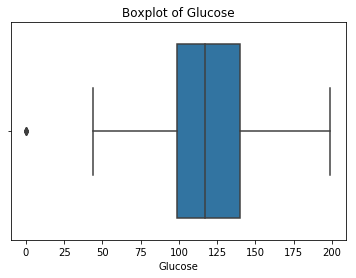

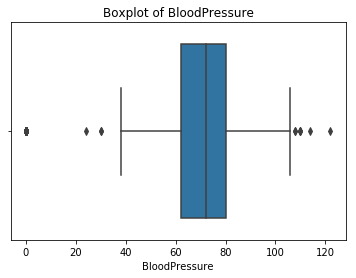

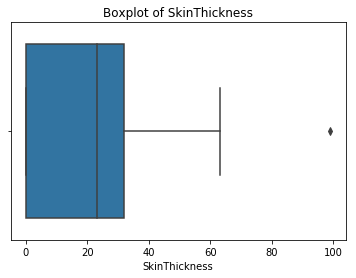

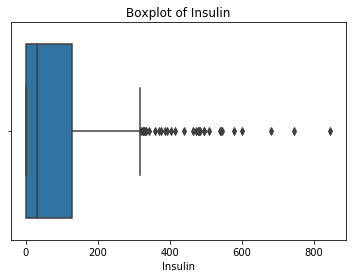

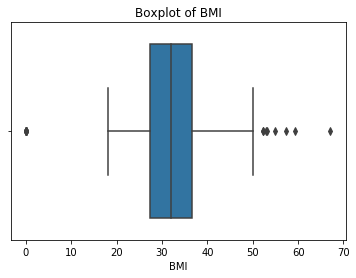

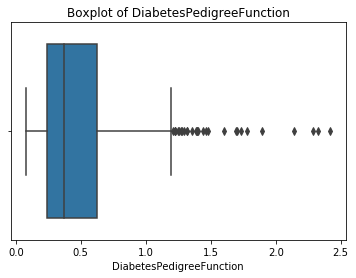

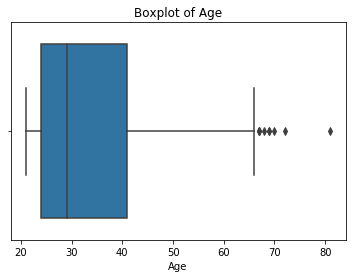

In [12]:
def boxplot_num(data,numeric_cols):
    for col in numeric_cols:
        sns.boxplot(data[col])
        plt.xlabel(col)
        plt.title('Boxplot of ' + col)
        plt.show()
 
boxplot_num(df,num_cols)

There are outliers in all variables except Outcome variable.So we can replace the outliers later.

# Data Preprocessing

In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df[df==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN


At first sight, it can be thought that there are no missing values in dataset.

However, variables such as Age, Blood Pressure, BMI, Glucose, Insulin, Skin Thickness contains 0. This is simply not possible. Those values need to be changed with NaNs.

In [15]:
zero_col=['Age','BloodPressure','BMI','Glucose','Insulin','SkinThickness']

df[zero_col]=df[zero_col].replace(0,np.NaN)

In [16]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We need to fill the Missing values with the median values in accordance with Target variable "Outcome".

# Glucose

In [17]:
df.groupby('Outcome')['Glucose'].median()

Outcome
0    107.0
1    140.0
Name: Glucose, dtype: float64

In [18]:
# Filling 'Glucose' missing value with median value based on Outcome.
df.loc[(df['Outcome']== 0) & (df['Glucose'].isnull()), 'Glucose']=107

df.loc[(df['Outcome']== 1) & (df['Glucose'].isnull()),'Glucose']= 140

# Blood Pressure

In [19]:
df.groupby('Outcome')['BloodPressure'].median()

Outcome
0    70.0
1    74.5
Name: BloodPressure, dtype: float64

In [20]:
# Filling 'Glucose' missing value with median value based on Outcome.
df.loc[(df['Outcome']== 0) & (df['BloodPressure'].isnull()), 'BloodPressure']=70

df.loc[(df['Outcome']== 1) & (df['BloodPressure'].isnull()),'BloodPressure']= 74.5

# SkinThickness

In [21]:
df.groupby('Outcome')['SkinThickness'].median()

Outcome
0    27.0
1    32.0
Name: SkinThickness, dtype: float64

In [22]:
df.loc[(df['Outcome']==0) & (df['SkinThickness'].isnull()), 'SkinThickness']=27

df.loc[(df['Outcome']==1) & (df['SkinThickness'].isnull()), 'SkinThickness']=32

# Insulin

In [23]:
df.groupby('Outcome')['Insulin'].median()

Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64

In [24]:
df.loc[(df['Outcome']==0) & (df['Insulin'].isnull()), 'Insulin']=102.5
df.loc[(df['Outcome']==1) & (df['Insulin'].isnull()), 'Insulin']=169.5

# BMI

In [25]:
df.groupby('Outcome')['BMI'].median()

Outcome
0    30.1
1    34.3
Name: BMI, dtype: float64

In [26]:
df.loc[(df['Outcome']==0) & (df['BMI'].isnull()), 'BMI']=30.1
df.loc[(df['Outcome']==1) & (df['BMI'].isnull()), 'BMI']=34.3

In [27]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Outliers Replacing

In [28]:
print(df[num_cols].skew())

Pregnancies                 0.901674
Glucose                     0.532324
BloodPressure               0.140830
SkinThickness               0.817477
Insulin                     3.028046
BMI                         0.606416
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64


check with the skewness value, which explains the extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
#Deteriming Outlier Thresholds of each variables.
def outlier_thresholds(dataframe,variable):
    quantile1=dataframe[variable].quantile(0.25)
    quantile3=dataframe[variable].quantile(0.75)
    IQR_range=quantile3-quantile1
    up_limit=quantile3 + 1.5*IQR_range
    low_limit=quantile1 - 1.5*IQR_range
    return low_limit,up_limit

In [31]:
# Function prints the variables which have values lower than low_limit (Determined by outlier_thresholds function) 
# and higher than high_limit (Determined by outlier_thresholds function).

def has_outliers(dataframe,variable):
    low_limit, up_limit=outlier_thresholds(dataframe,variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
        
for col in num_cols:
    has_outliers(df, num_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] yes
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] yes
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] yes
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] yes
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] yes
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] yes
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] yes
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] yes


In [32]:
#defining a function to replace outliers which have both lower and higher outliers.
def replace_outliers(dataframe,variable):
    low_limit, up_limit = outlier_thresholds(dataframe,variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

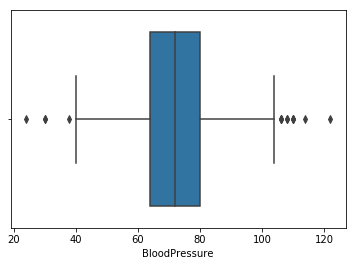

In [34]:
sns.boxplot(df.BloodPressure)

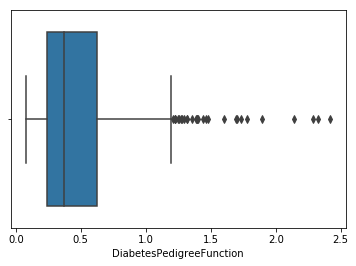

In [35]:
sns.boxplot(df.DiabetesPedigreeFunction)

In [36]:
replace_outliers(df,'BloodPressure')
replace_outliers(df,'DiabetesPedigreeFunction')

In [37]:
# Replacing outliers which have only higher outliers
def replace_outliers2(dataframe,variable):
    low_limit, up_limit = outlier_thresholds(dataframe,variable)
    dataframe.loc[(dataframe[variable] > up_limit),variable] = up_limit
replace_outliers2(df, 'Insulin')

In [38]:
def replace_outliers3(dataframe,variable):
    low_limit, up_limit = outlier_thresholds(dataframe,variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
replace_outliers3(df,'SkinThickness')    

In [39]:
y=df['Outcome']
X=df.drop(['Outcome'], axis=1)

# Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
# Dataset split into test and train (Holdout)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10) # 80% train, 20% test 

# Standardizing

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train[num_cols])
X_train[num_cols]=scaler.transform(X_train[num_cols])

C:\Users\sandeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sandeep\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [42]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
491,-0.537881,-1.063446,1.484210,0.107683,-0.501141,0.159813,-0.558138,0.748827
69,0.061376,0.761981,1.060871,-0.233807,-0.542234,-0.520943,-0.925285,-0.522096
667,1.859148,-0.358895,-0.209147,-0.233807,0.600130,-0.728129,-1.096383,0.579370
566,-0.837509,-0.743196,-0.039811,0.107683,-1.890059,0.914564,-0.130394,-1.030465
97,-0.837509,-1.639897,-2.071840,-1.258277,-0.936719,-1.778861,-0.447638,-0.945737


In [43]:
X_test[num_cols]=scaler.transform(X_test[num_cols])


C:\Users\sandeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sandeep\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Model Building

In [44]:
import statsmodels.api as sm

In [45]:
#Logistic regression model
log1=sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log1.fit().summary()

C:\Users\sandeep\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      528
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -220.60
Date:                Fri, 04 Dec 2020   Deviance:                       441.21
Time:                        15:02:41   Pearson chi2:                     523.
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0696      0.131     -8.182      0.000      -1.326      -0.813
Pregnancies                  0.2200      0.129      1.710      0.087      -0.032       0.472
Glucose                      0.8455      0.147      5.738      0.000       0.557       1.134
BloodPressure               -0.0104      0.133     -0.079      0.937      -0.271       0.250
SkinThickness                0.5100      0.157      3.242      0.001       0.202       0.818
Insulin                      0.7633      0.141      5.421      0.000       0.487       1.039
BMI                          0.2768      0.152      1.816      0.069      -0.022       0.576
DiabetesPedigreeFunction     0.2353      0.118      1.992      0.046       0.004       0.467
Age                          0.3243      0.138      2.342      0.019       0.053       0.596
============================================================================================
"""

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 7)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Pregnancies', True, 1),
 ('Glucose', True, 1),
 ('BloodPressure', False, 2),
 ('SkinThickness', True, 1),
 ('Insulin', True, 1),
 ('BMI', True, 1),
 ('DiabetesPedigreeFunction', True, 1),
 ('Age', True, 1)]

In [48]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
491,-0.537881,-1.063446,1.484210,0.107683,-0.501141,0.159813,-0.558138,0.748827
69,0.061376,0.761981,1.060871,-0.233807,-0.542234,-0.520943,-0.925285,-0.522096
667,1.859148,-0.358895,-0.209147,-0.233807,0.600130,-0.728129,-1.096383,0.579370
566,-0.837509,-0.743196,-0.039811,0.107683,-1.890059,0.914564,-0.130394,-1.030465
97,-0.837509,-1.639897,-2.071840,-1.258277,-0.936719,-1.778861,-0.447638,-0.945737


In [49]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
train_pred=log.predict(X_train)

In [51]:
from sklearn.metrics import classification_report,accuracy_score

#checking model performance using accuaracy and recall
print("accuracy on train data:",classification_report(y_train,train_pred))

accuracy on train data:               precision    recall  f1-score   support

           0       0.83      0.90      0.86       356
           1       0.75      0.63      0.69       181

    accuracy                           0.81       537
   macro avg       0.79      0.76      0.77       537
weighted avg       0.80      0.81      0.80       537



# Prediction on test data

In [52]:
#prediction on test data.
test_pred=log.predict(X_test)

print("accuracy on train data:",classification_report(y_test,test_pred))

accuracy on train data:               precision    recall  f1-score   support

           0       0.78      0.88      0.83       144
           1       0.75      0.59      0.66        87

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [53]:
#MODEL2 DECISION TREE CLASSIFIER AND FITTING ON TRAIN AND VALIDATION
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

#predicting on train_X,valdiation_x and storing in variables
train_preds2=dtc.predict(X_train)
test_preds2=dtc.predict(X_test)

In [54]:
#checking accuracy and recall on train and validation
print("accuracy on train data:",classification_report(y_train,train_preds2))
print("accuracy on test data:",classification_report(y_test,test_preds2))
train_score2=accuracy_score(y_train,train_preds2)
valid_score2=accuracy_score(y_test,test_preds2)

accuracy on train data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       181

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

accuracy on test data:               precision    recall  f1-score   support

           0       0.89      0.93      0.91       144
           1       0.88      0.80      0.84        87

    accuracy                           0.88       231
   macro avg       0.88      0.87      0.87       231
weighted avg       0.88      0.88      0.88       231



In [55]:
#MODEL3 KNN CLASIFIER
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

#predicting on train and validation
train_preds3=knn.predict(X_train)
test_preds3=knn.predict(X_test)

#checking accuarcy score on train and validation
print("accuracy_score on train data:",accuracy_score(y_train,train_preds3))
print("accuracy_score on test data:",accuracy_score(y_test,test_preds3))

train_score3=accuracy_score(y_train,train_preds3)
valid_score3=accuracy_score(y_test,test_preds3)

accuracy_score on train data: 0.9068901303538175
accuracy_score on test data: 0.8528138528138528


In [56]:
#MODEL 4
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()

 
param_grid = {

'C': [0.001, 0.01, 0.1, 1, 10],
'gamma': [0.001, 0.01, 0.1, 1], 
'kernel':['linear','rbf']}

 
svc_cv = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 10,n_jobs=-1)

In [57]:
svc_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
#predicting on train and validation
train_preds4=svc_cv.best_estimator_.predict(X_train)
test_preds4=svc_cv.best_estimator_.predict(X_test)

In [59]:

#checking accuarcy score on train and validation
print("accuracy_score on train data:",accuracy_score(y_train,train_preds4))
print("accuracy_score on validaion data:",accuracy_score(y_test,test_preds4))

train_score4=accuracy_score(y_train,train_preds4)
test_score4=accuracy_score(y_test,test_preds4)

accuracy_score on train data: 0.8957169459962756
accuracy_score on validaion data: 0.8571428571428571


# Saving Model 

In [60]:
import pickle
# open a file, where you ant to store the data
file = open('svc.pkl', 'wb')

# dump information to that file
pickle.dump(svc_cv, file)

In [61]:
svc_mdl=pickle.load(open('svc.pkl','rb'))

In [72]:
svc_mdl.predict([[3,100,64,3,25,34.5,0.56,20]])

array([0], dtype=int64)